In [39]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13, 5)

In [40]:
import torch

Text(0.5, 1.0, '$y=sin(x)$')

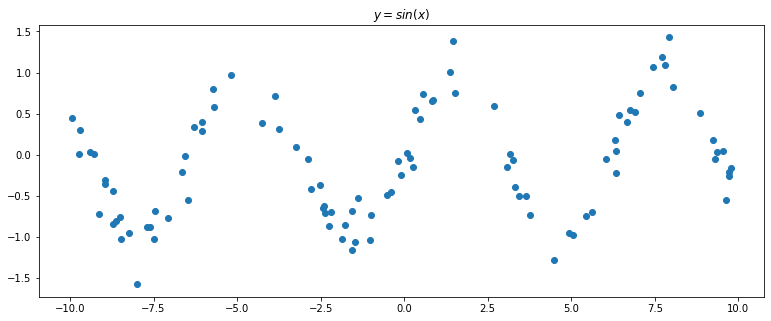

In [41]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10

noise = torch.randn(y_train.shape[0])/5
y_train = torch.sin(x_train) + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y=sin(x)$')

In [42]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[-0.7398],
        [-0.5494],
        [-0.4133],
        [-1.0221],
        [ 0.5464],
        [ 0.8215],
        [-0.7492],
        [-0.2190],
        [-0.2654],
        [-0.4857],
        [-0.3552],
        [-0.0721],
        [-0.0694],
        [ 0.4392],
        [-0.0516],
        [-0.6861],
        [ 0.0286],
        [-1.0251],
        [-0.4409],
        [ 1.3781],
        [-0.7024],
        [ 0.0058],
        [ 0.3938],
        [-0.7225],
        [-0.1473],
        [-1.1570],
        [-0.9811],
        [ 0.5150],
        [-0.4507],
        [-0.6293],
        [-0.5538],
        [ 0.0270],
        [-0.6808],
        [-1.5807],
        [-0.1536],
        [-0.2525],
        [ 0.8035],
        [ 0.4796],
        [-0.7615],
        [ 1.1921],
        [ 1.0096],
        [ 0.1833],
        [ 1.0933],
        [-0.7005],
        [ 0.0441],
        [ 0.2930],
        [-0.7133],
        [ 0.3096],
        [ 0.6686],
        [-0.2066],
        [-1.0423],
        [-0.3689],
        [-0.

# Валидация для синуса

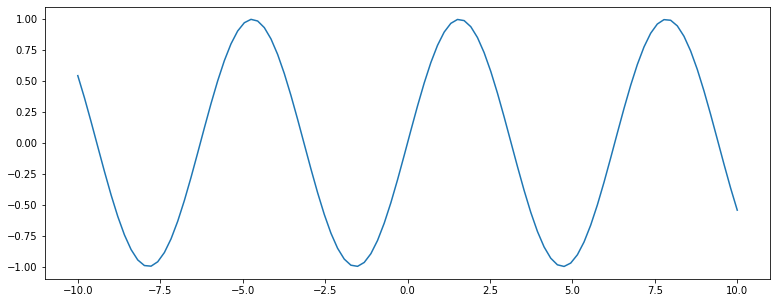

In [43]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation, y_validation)

In [44]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

# Класс нейронной сети

In [50]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
sine_net = SineNet(10) 

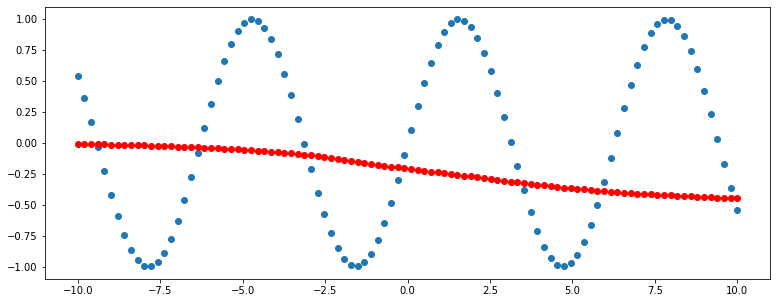

In [51]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label = 'Ground truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c= 'r', label = 'Prediction')
    
predict(sine_net, x_validation, y_validation)

## Оптимизация 

In [52]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)

## Функция потерь

In [53]:
def loss(pred, target):
    squares = (pred - target)**2
    return squares.mean()

## Тренировка

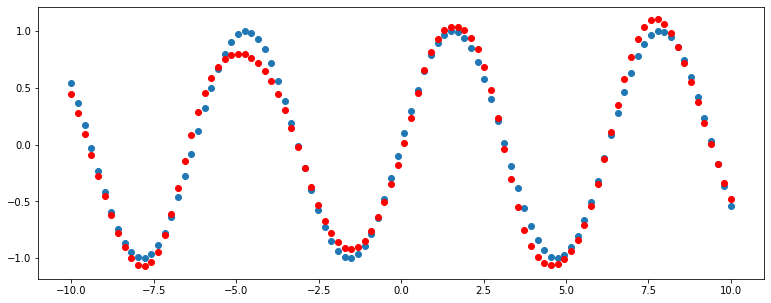

In [54]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    
    y_pred = sine_net.forward(x_train)
    loss_vall = loss(y_pred, y_train)
    
    loss_vall.backward()
    
    optimizer.step()
    
predict(sine_net, x_validation, y_validation)